## Decision trees with the UCI Adult dataset 

### The "Adult" dataset

#### Dataset description:

UCI Adult: classify people using demographical data - whether they earn more than \$50,000 per year or not.

Dataset is in `data` folder

Feature descriptions:

- **Age** – continuous feature
- **Workclass** –  continuous feature
- **fnlwgt** – final weight of object, continuous feature
- **Education** –  categorical feature
- **Education_Num** – number of years of education, continuous feature
- **Martial_Status** –  categorical feature
- **Occupation** –  categorical feature
- **Relationship** – categorical feature
- **Race** – categorical feature
- **Sex** – categorical feature
- **Capital_Gain** – continuous feature
- **Capital_Loss** – continuous feature
- **Hours_per_week** – continuous feature
- **Country** – categorical feature

**Categorical Attributes**

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. Individual's highest education degree

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. Individual marital status

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

Individual's occupation

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. Individual's relation in a family

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. Race of Individual

sex: Female, Male.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country

**Continuous Attributes**

age: continuous. Age of an individual

fnlwgt: final weight, continuous. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

Individual's working hour per week

**Target** – earnings level, categorical (binary) feature.

#### 1. Reading train and test data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:

adult_train = pd.read_csv("data/adult_train.csv",sep = ";")
adult_train

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
adult_test = pd.read_csv("data/adult_test.csv",sep = ";")

adult_test = adult_test.iloc[1:,:]
adult_test

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [4]:
# necessary to remove rows with incorrect labels in test dataset
adult_test = adult_test[(adult_test['Target'] == ' >50K.') | (adult_test['Target']==' <=50K.')]

#### 2. Encode
Encode target as
```
<=50K ---> 0

>50K -----> 1
```

In [5]:
#Ojo, sacar valores únicos porque en test los string del target son diferentes

print(np.unique(adult_train["Target"], return_counts=True))
print(np.unique(adult_test["Target"], return_counts=True))

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))
(array([' <=50K.', ' >50K.'], dtype=object), array([12435,  3846], dtype=int64))


In [6]:
#encoding train

adult_train.loc[adult_train['Target'] == ' <=50K', 'Target'] = 0
adult_train.loc[adult_train['Target'] == ' >50K', 'Target'] = 1


#encoding test

adult_test.loc[adult_test['Target'] == ' <=50K.', 'Target'] = 0
adult_test.loc[adult_test['Target'] == ' >50K.', 'Target'] = 1

#### 3. Primary data analysis
1. Get a description in one unique table of all features and target of train
2. Get the value counts of target
3. Plot a grid of histograms of all columns (categorical included).

In [7]:
#3.1

adult_train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,32561,NaN,NaN,NaN,38.5816,13.6404,17,28,37,48,90
Workclass,30725,8,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561,NaN,NaN,NaN,189778,105550,12285,117827,178356,237051,1.48470e+06
Education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,32561,NaN,NaN,NaN,10.0807,2.57272,1,9,10,12,16
Martial_Status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,30718,14,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 3.2

adult_train['Target'].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

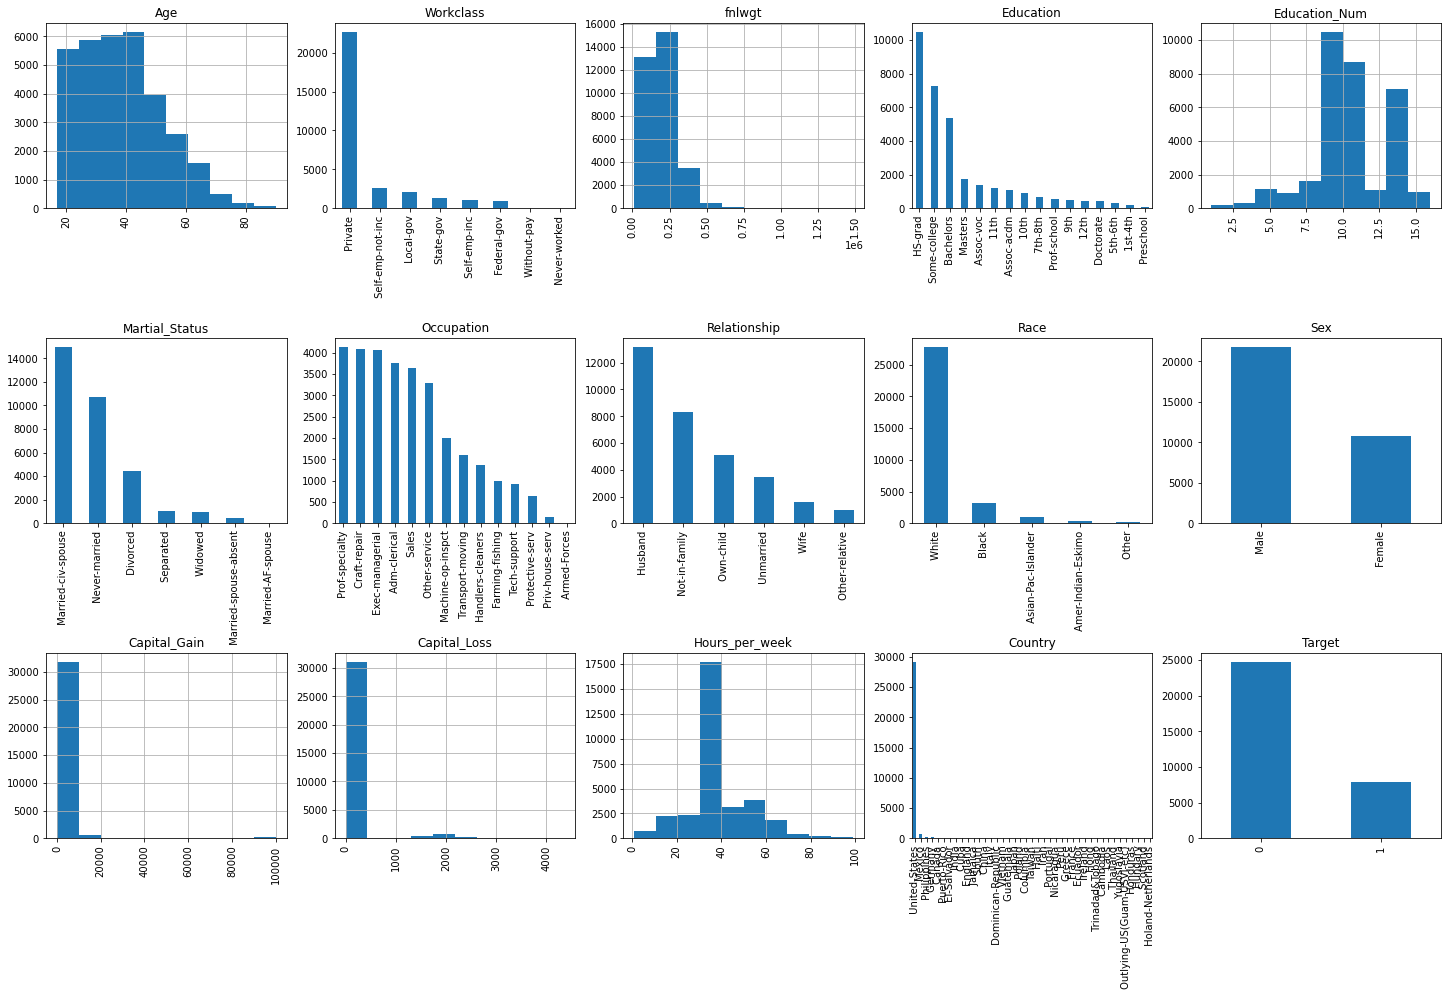

In [9]:
#3.3

fig = plt.figure(figsize=(25, 15))
cols = 5
rows = int(np.ceil(float(adult_train.shape[1]) / cols))

for i, column in enumerate(adult_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if adult_train.dtypes[column] == object:
        adult_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        adult_train[column].hist(axes=ax)        
        plt.xticks(rotation="vertical")

plt.subplots_adjust(hspace=0.7, wspace=0.2)

#### 4. Checking data types
1. Check the types of train and test. ¿Any difference?
2. There is an int feature in train, that is considered as object in test. Solve it
3. Cast all numeric types to the numeric types of the train

In [10]:
pd.DataFrame({"train" : adult_train.dtypes,"test" : adult_test.dtypes})

,train,test
Age,int64,object
Workclass,object,object
fnlwgt,int64,float64
Education,object,object
Education_Num,int64,float64
Martial_Status,object,object
Occupation,object,object
Relationship,object,object
Race,object,object
Sex,object,object


In [11]:
adult_test["Age"] = adult_test["Age"].astype("int64")
adult_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16281 non-null  int64  
 1   Workclass       15318 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   Education       16281 non-null  object 
 4   Education_Num   16281 non-null  float64
 5   Martial_Status  16281 non-null  object 
 6   Occupation      15315 non-null  object 
 7   Relationship    16281 non-null  object 
 8   Race            16281 non-null  object 
 9   Sex             16281 non-null  object 
 10  Capital_Gain    16281 non-null  float64
 11  Capital_Loss    16281 non-null  float64
 12  Hours_per_week  16281 non-null  float64
 13  Country         16007 non-null  object 
 14  Target          16281 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 2.0+ MB


In [12]:
for col in adult_test.columns[adult_test.dtypes == "float64"]:
    adult_test[col] = adult_test[col].astype("int64")

adult_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   Education       16281 non-null  object
 4   Education_Num   16281 non-null  int64 
 5   Martial_Status  16281 non-null  object
 6   Occupation      15315 non-null  object
 7   Relationship    16281 non-null  object
 8   Race            16281 non-null  object
 9   Sex             16281 non-null  object
 10  Capital_Gain    16281 non-null  int64 
 11  Capital_Loss    16281 non-null  int64 
 12  Hours_per_week  16281 non-null  int64 
 13  Country         16007 non-null  object
 14  Target          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.0+ MB


#### 5. Missing data
1. Fill in missing data for continuous features with their median values
2. Fill in missing data for categorical features with their mode.

In [13]:
adult_train["Age"].mean()

38.58164675532078

In [14]:
#para train

for col in adult_train.columns:
    if adult_train.dtypes[col] == object:
        adult_train[col].fillna(adult_train[col].mode()[0],inplace = True)
        #print(col,adult_train[col].mode()[0])
    else:
        adult_train[col].fillna(adult_train[col].median(),inplace = True)
        #print(col,adult_train[col].median())

adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [15]:
#para test

for col in adult_test.columns:
    if adult_test.dtypes[col] == object:
        adult_test[col].fillna(adult_test[col].mode()[0],inplace = True)
        #print(col,adult_test[col].mode()[0])
    else:
        adult_test[col].fillna(adult_test[col].median(),inplace = True)
        #print(col,adult_test[col].median())

adult_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   Education       16281 non-null  object
 4   Education_Num   16281 non-null  int64 
 5   Martial_Status  16281 non-null  object
 6   Occupation      16281 non-null  object
 7   Relationship    16281 non-null  object
 8   Race            16281 non-null  object
 9   Sex             16281 non-null  object
 10  Capital_Gain    16281 non-null  int64 
 11  Capital_Loss    16281 non-null  int64 
 12  Hours_per_week  16281 non-null  int64 
 13  Country         16281 non-null  object
 14  Target          16281 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.0+ MB


#### 6. Encoding categorical
Encode with one hot encoder all the categorical features

We'll encode some categorical features: **Workclass**, **Education**, **Martial_Status**, **Occupation**, **Relationship**, **Race**, **Sex**, **Country** using sklearn methods 
make_column_transformer() y one_hot_encoder()

In [16]:
#No hacemos get dummies, hacemos un one hot encoder que es mejor opción #en un proyecto real. 
# Nos evitamos el riesgo de acabar con más variables #o variables diferentes en train y test gracias al parámetro handle_unknown = 'ignore'


In [17]:
#https://datagy.io/sklearn-one-hot-encode/
#https://stackoverflow.com/questions/70933014/how-to-use-columntransformer-to-return-a-dataframe

In [18]:

#primero obtengo las lista de las columnas categóricas en adult_train para pasarselas al transformer 
# #que vamos a montar para usar el one hot encoder

col_cat = adult_train.columns[adult_train.dtypes == object]

Index(['Workclass', 'Education', 'Martial_Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Country'],
      dtype='object')

In [51]:
# One-hot encoding multiple columns and recompose de dataframe

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), ['Workclass', 'Education', 'Martial_Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Country']),remainder='passthrough')

transformer.fit(adult_train)

transformed = transformer.transform(adult_train).toarray()

transformed_train_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

transformed_train_df


,onehotencoder__x0_ Federal-gov,onehotencoder__x0_ Local-gov,onehotencoder__x0_ Never-worked,onehotencoder__x0_ Private,onehotencoder__x0_ Self-emp-inc,onehotencoder__x0_ Self-emp-not-inc,onehotencoder__x0_ State-gov,onehotencoder__x0_ Without-pay,onehotencoder__x1_ 10th,onehotencoder__x1_ 11th,...,onehotencoder__x7_ United-States,onehotencoder__x7_ Vietnam,onehotencoder__x7_ Yugoslavia,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,50.0,83311.0,13.0,0.0,0.0,13.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,38.0,215646.0,9.0,0.0,0.0,40.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,53.0,234721.0,7.0,0.0,0.0,40.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,28.0,338409.0,13.0,0.0,0.0,40.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,27.0,257302.0,12.0,0.0,0.0,38.0,0.0
32557,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,40.0,154374.0,9.0,0.0,0.0,40.0,1.0
32558,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,58.0,151910.0,9.0,0.0,0.0,40.0,0.0
32559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,22.0,201490.0,9.0,0.0,0.0,20.0,0.0


In [50]:
transformed = transformer.transform(adult_test).toarray()

transformed_test_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

transformed_test_df

,onehotencoder__x0_ Federal-gov,onehotencoder__x0_ Local-gov,onehotencoder__x0_ Never-worked,onehotencoder__x0_ Private,onehotencoder__x0_ Self-emp-inc,onehotencoder__x0_ Self-emp-not-inc,onehotencoder__x0_ State-gov,onehotencoder__x0_ Without-pay,onehotencoder__x1_ 10th,onehotencoder__x1_ 11th,...,onehotencoder__x7_ United-States,onehotencoder__x7_ Vietnam,onehotencoder__x7_ Yugoslavia,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,25.0,226802.0,7.0,0.0,0.0,40.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,38.0,89814.0,9.0,0.0,0.0,50.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,28.0,336951.0,12.0,0.0,0.0,40.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,44.0,160323.0,10.0,7688.0,0.0,40.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,18.0,103497.0,10.0,0.0,0.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,39.0,215419.0,13.0,0.0,0.0,36.0,0.0
16277,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,64.0,321403.0,9.0,0.0,0.0,40.0,0.0
16278,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,38.0,374983.0,13.0,0.0,0.0,50.0,0.0
16279,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,44.0,83891.0,13.0,5455.0,0.0,40.0,0.0


#### 8. Divide train and test in features and target

In [52]:
X_train = transformed_train_df.drop(['Target'], axis = 1)
y_train = transformed_train_df['Target']

X_test = transformed_test_df.drop(['Target'], axis = 1)
y_test = transformed_test_df['Target']

#### 9. Decision tree

Train a decision tree **(DecisionTreeClassifier)** with a maximum depth of 3, and evaluate the accuracy metric on the test data. Use parameter **random_state = 17** for results reproducibility.

In [53]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=17)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

Make a prediction with the trained model on the test data.

In [54]:
tree_clf_predictions = tree_clf.predict(X_test)

In [55]:
accuracy_score(y_test, tree_clf_predictions)

0.8447884036607088

#### 10. Check the documentation on DecissionTreeClassifier and tune the hyperparameters in order to get better predictions
Hyperparameters that you can tune: splitter, max_depth, min_samples_split, min_samples_leaf, max_features...

In [56]:
tree = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2,3,4,5,6,7],
'min_samples_leaf': np.arange(1,7)}

grid_tree = GridSearchCV(tree, parameters, scoring='accuracy', cv=10)

grid_tree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6])},
             scoring='accuracy')

In [ ]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)

0.8550109139340026
{'max_depth': 7, 'min_samples_leaf': 6}


In [ ]:
tree_predictions = grid_tree.predict(X_test)
accuracy_score(y_test, tree_predictions)

0.8571955039616731